In [1]:
library(ArchR)
library(here)
library(Seurat)
library(SeuratDisk)
library(SingleCellExperiment)
options(repr.plot.width=15, repr.plot.height=11)

## add general functions at the top of the R scripts
ss <- function(x, pattern, slot = 1, ...) { sapply(strsplit(x = x, split = pattern, ...), '[', slot) }


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 

In [2]:
#archr settings
addArchRGenome("hg38")
addArchRThreads(threads = 8) 

Setting default genome to Hg38.

Input threads is equal to or greater than ncores minus 1 (7)
Setting cores to ncores minus 2. Set force = TRUE to set above this number!

Setting default number of Parallel threads to 6.



In [3]:
#load project to be used
proj = loadArchRProject(here("data/tidy_data/ArchRProjects/BICCN_human_Str_snATAC"))

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

In [4]:
colData = getCellColData(proj)
colnames(colData)

[1] "Sample"                     "TSSEnrichment"             
 [3] "ReadsInTSS"                 "ReadsInPromoter"           
 [5] "ReadsInBlacklist"           "PromoterRatio"             
 [7] "PassQC"                     "NucleosomeRatio"           
 [9] "nMultiFrags"                "nMonoFrags"                
[11] "nFrags"                     "nDiFrags"                  
[13] "DoubletScore"               "DoubletEnrichment"         
[15] "BlacklistRatio"             "Brain.structure"           
[17] "Brain.structure.name"       "Brain.structure.color"     
[19] "Brain.region"               "Brain.region.name"         
[21] "Brodmann.areas..BA."        "Brain.region.color"        
[23] "Brain.dissetion.ID"         "Donor"                     
[25] "Technical.replicates"       "Tn5.batch"                 
[27] "Library.type"               "TSSe.threshold"            
[29] "Unique.fragments.threshold" "Sample.quality"            
[31] "X..of.nuclei.passed.QC"     "match"                     
[33] "celltype"                   "ClustersX300"

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74e157d4cb78-Date-2024-03-25_Time-19-12-08.888495.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
2 
3 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74e157d4cb78-Date-2024-03-25_Time-19-12-08.888495.log

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”


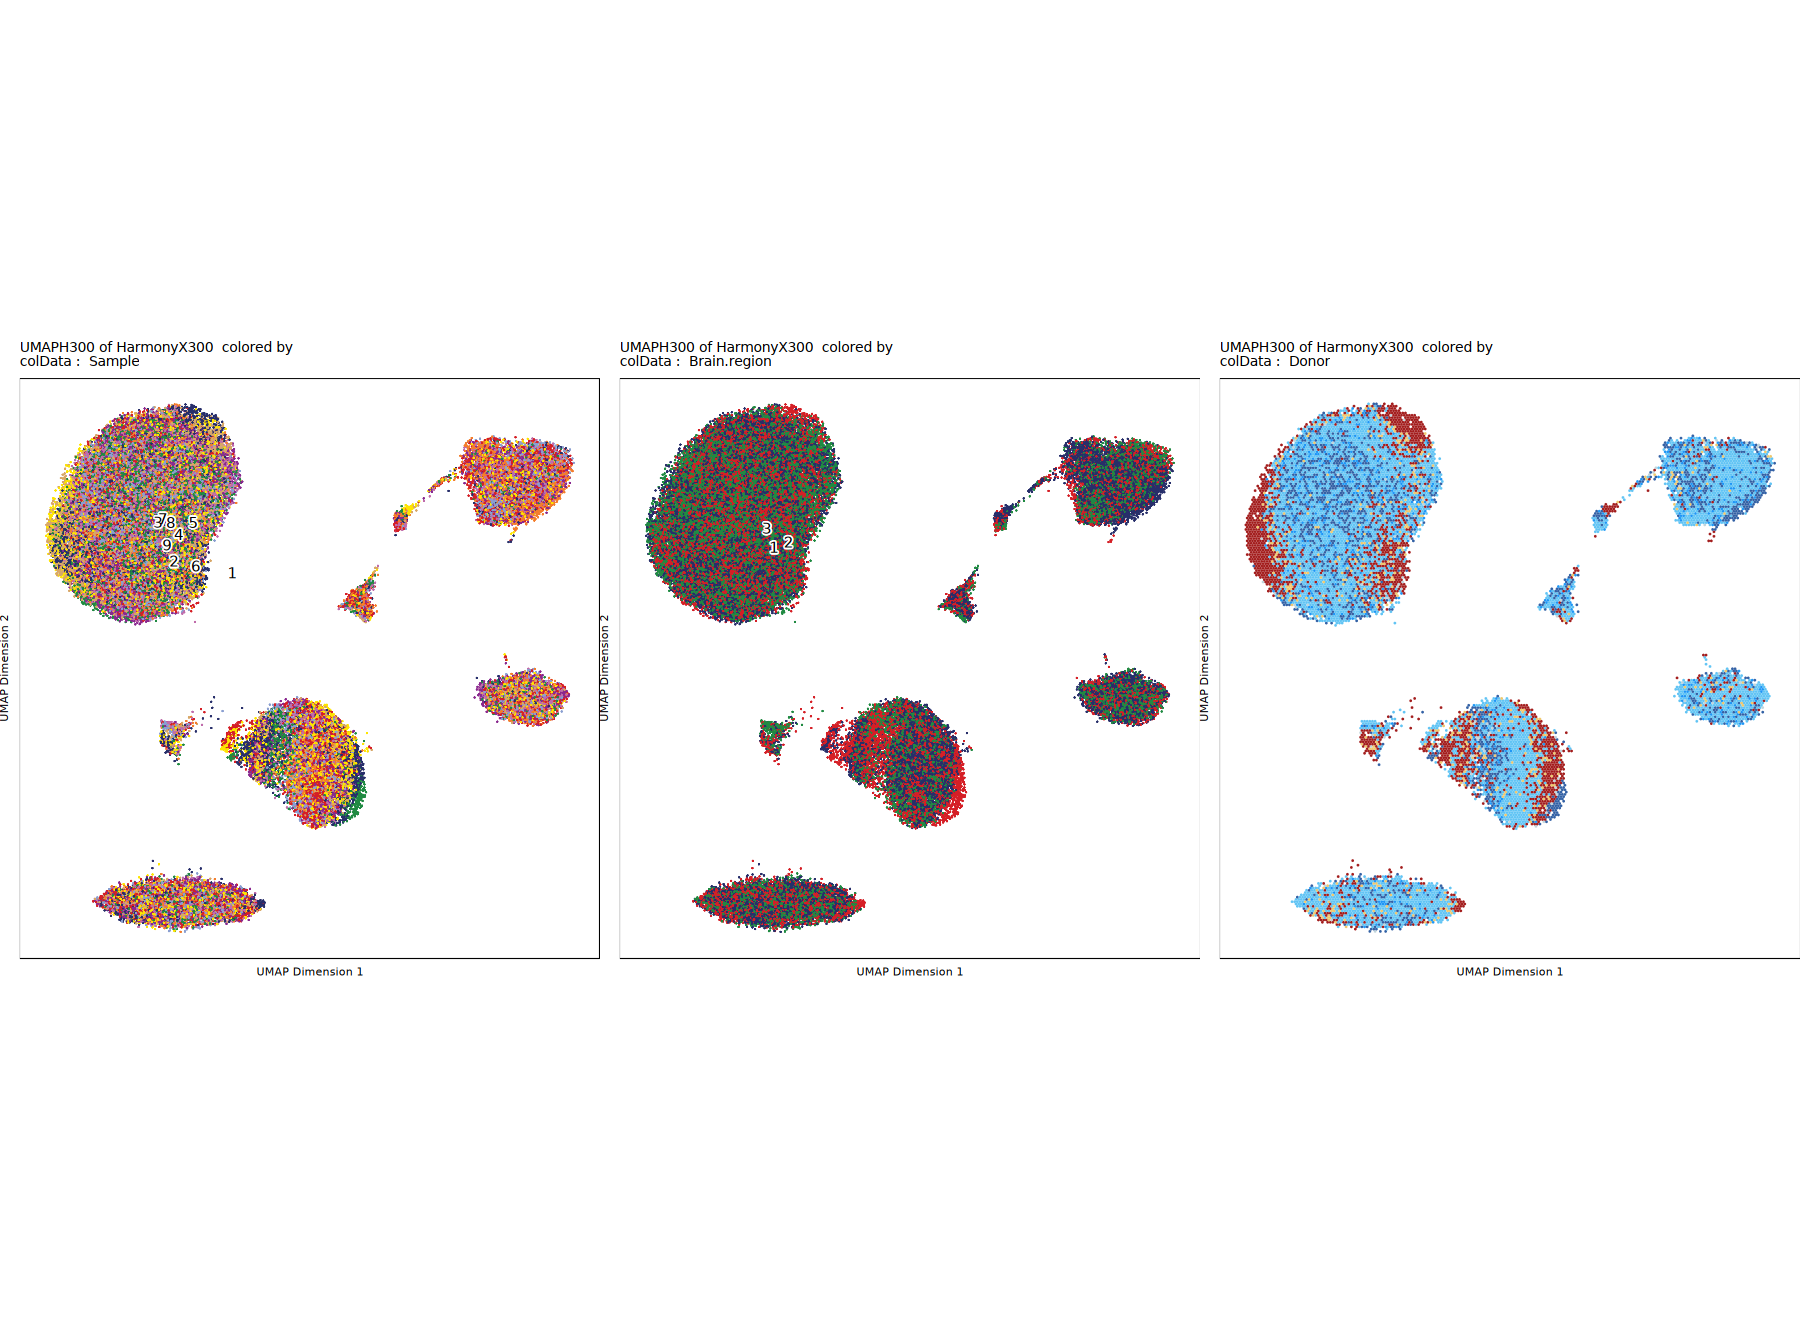

In [5]:
p <- plotEmbedding( ArchRProj = proj, colorBy = "cellColData", name = c('Sample', 'Brain.region', 'Donor'), embedding = "UMAPH300") 
p3 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
          axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p3))

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74e17dcd59ef-Date-2024-03-25_Time-19-12-31.691985.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74e17dcd59ef-Date-2024-03-25_Time-19-12-31.691985.log



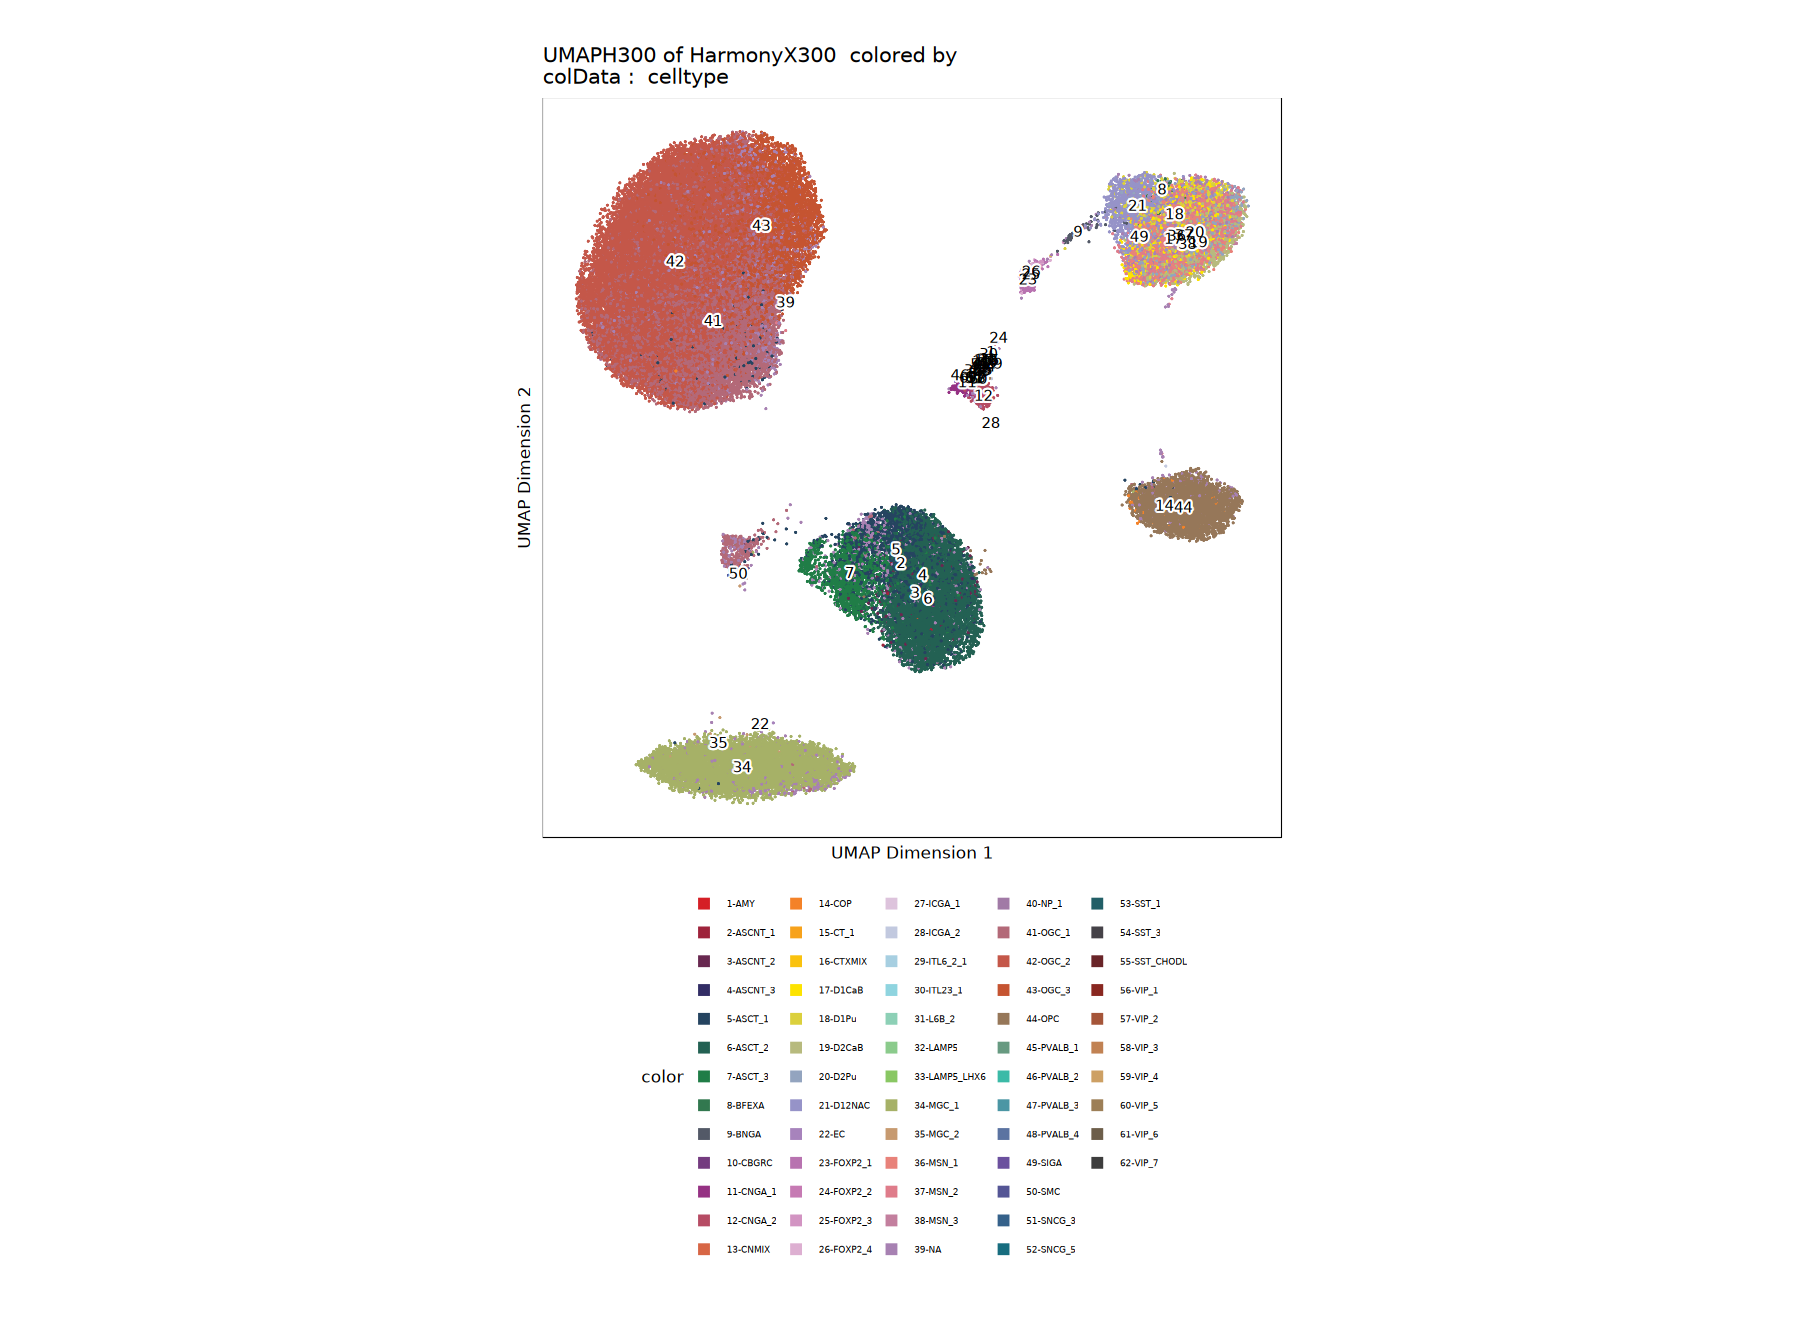

In [6]:
p <- plotEmbedding( ArchRProj = proj, colorBy = "cellColData", name = c('celltype'), embedding = "UMAPH300") 
p

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74e17df57259-Date-2024-03-25_Time-19-12-40.880264.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2024-03-25 19:12:41.755222 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 
9 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74e17df57259-Date-2024-03-25_Time-19-12-40.880264.log



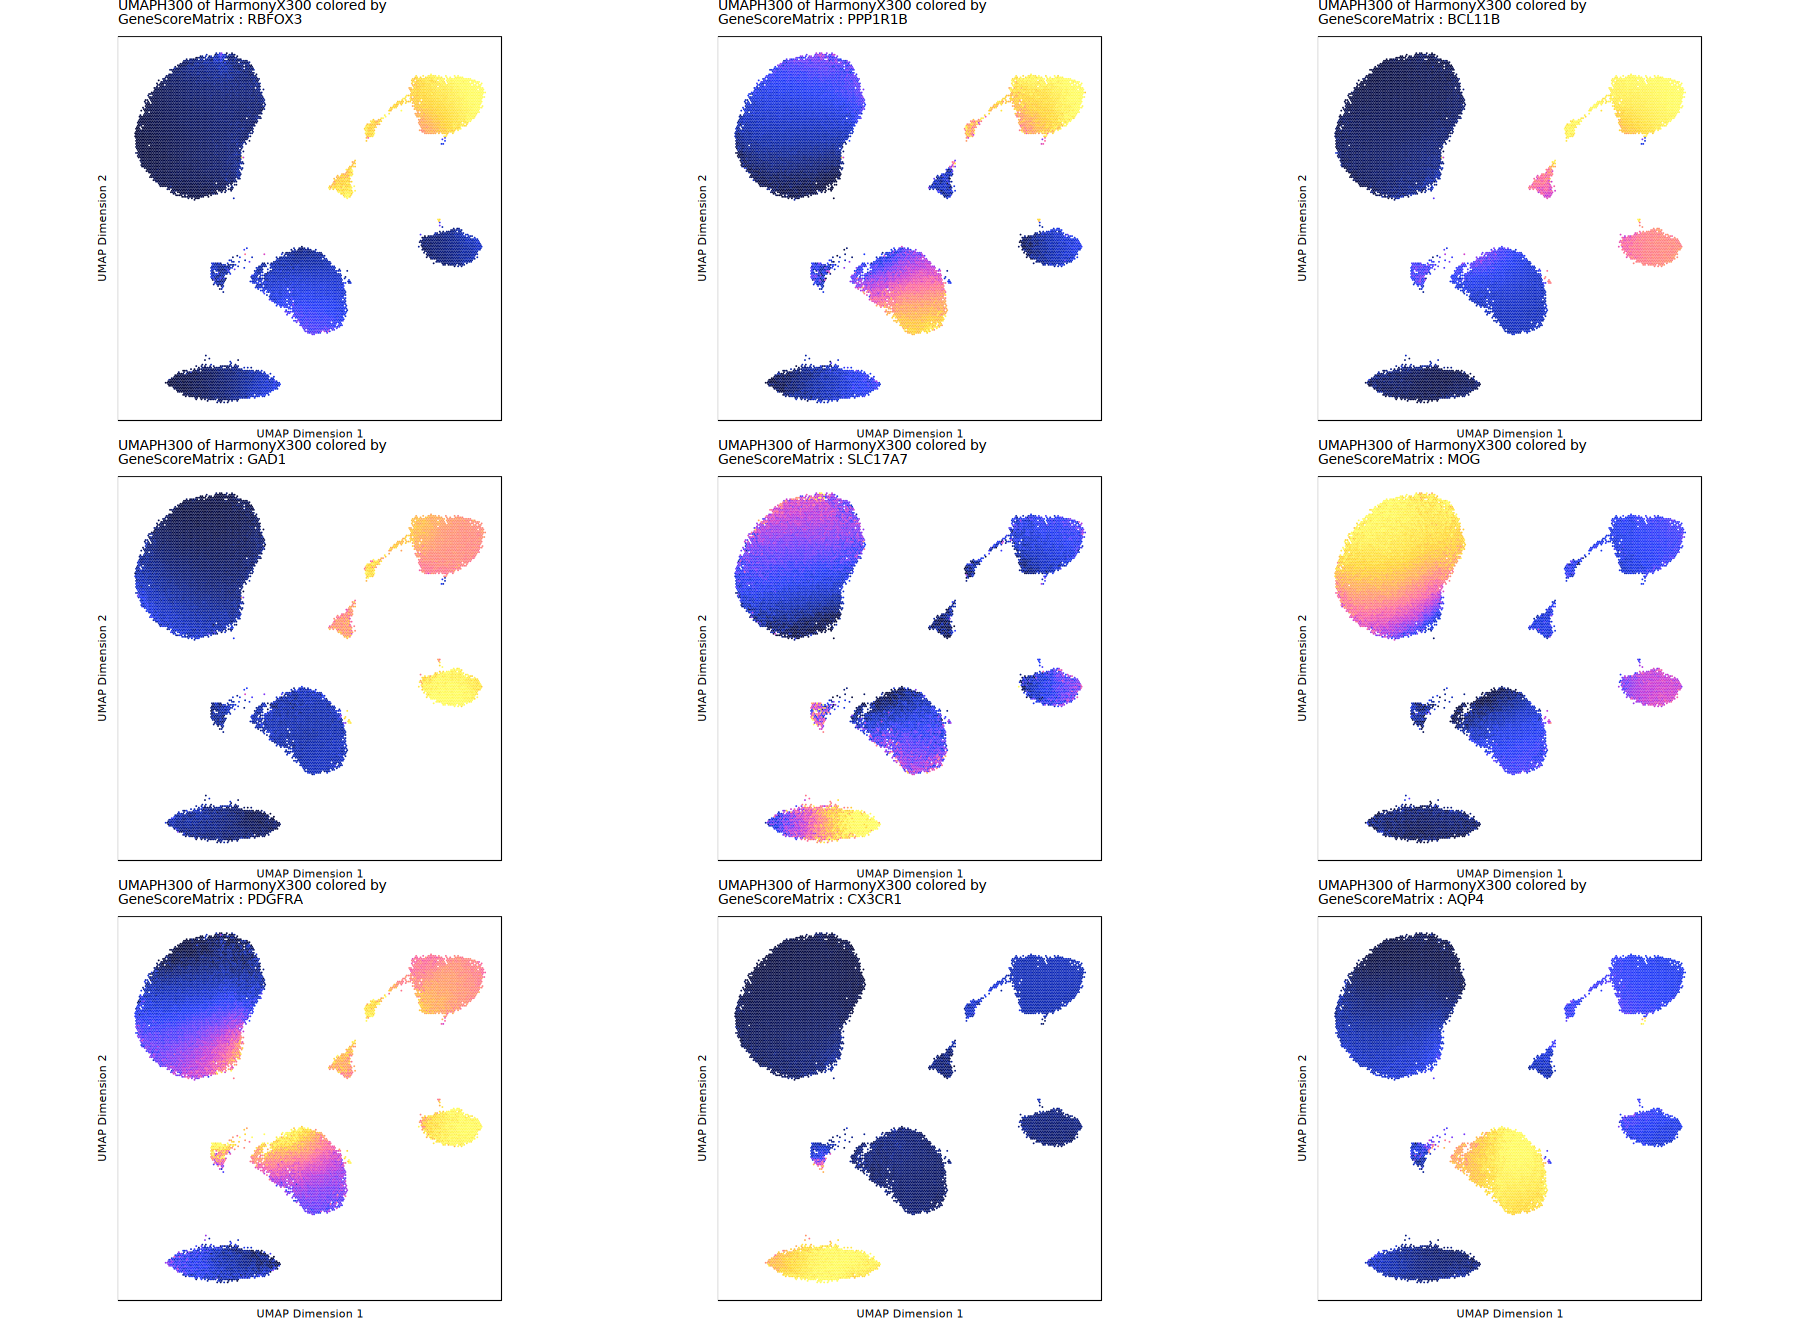

In [7]:
# MSN markers, Ppp1r1b = DARPP-32, Bcl11b=Ctip2
markMSN3 = c('RBFOX3', 'PPP1R1B','BCL11B', 'GAD1', 'SLC17A7', 'MOG', 'PDGFRA', 'CX3CR1', 'AQP4')
p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markMSN3, embedding = "UMAPH300") #, imputeWeights = NULL)
p3 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p3))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74e18d985e4-Date-2024-03-25_Time-19-15-47.372895.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2024-03-25 19:15:48.195531 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74e18d985e4-Date-2024-03-25_Time-19-15-47.372895.log



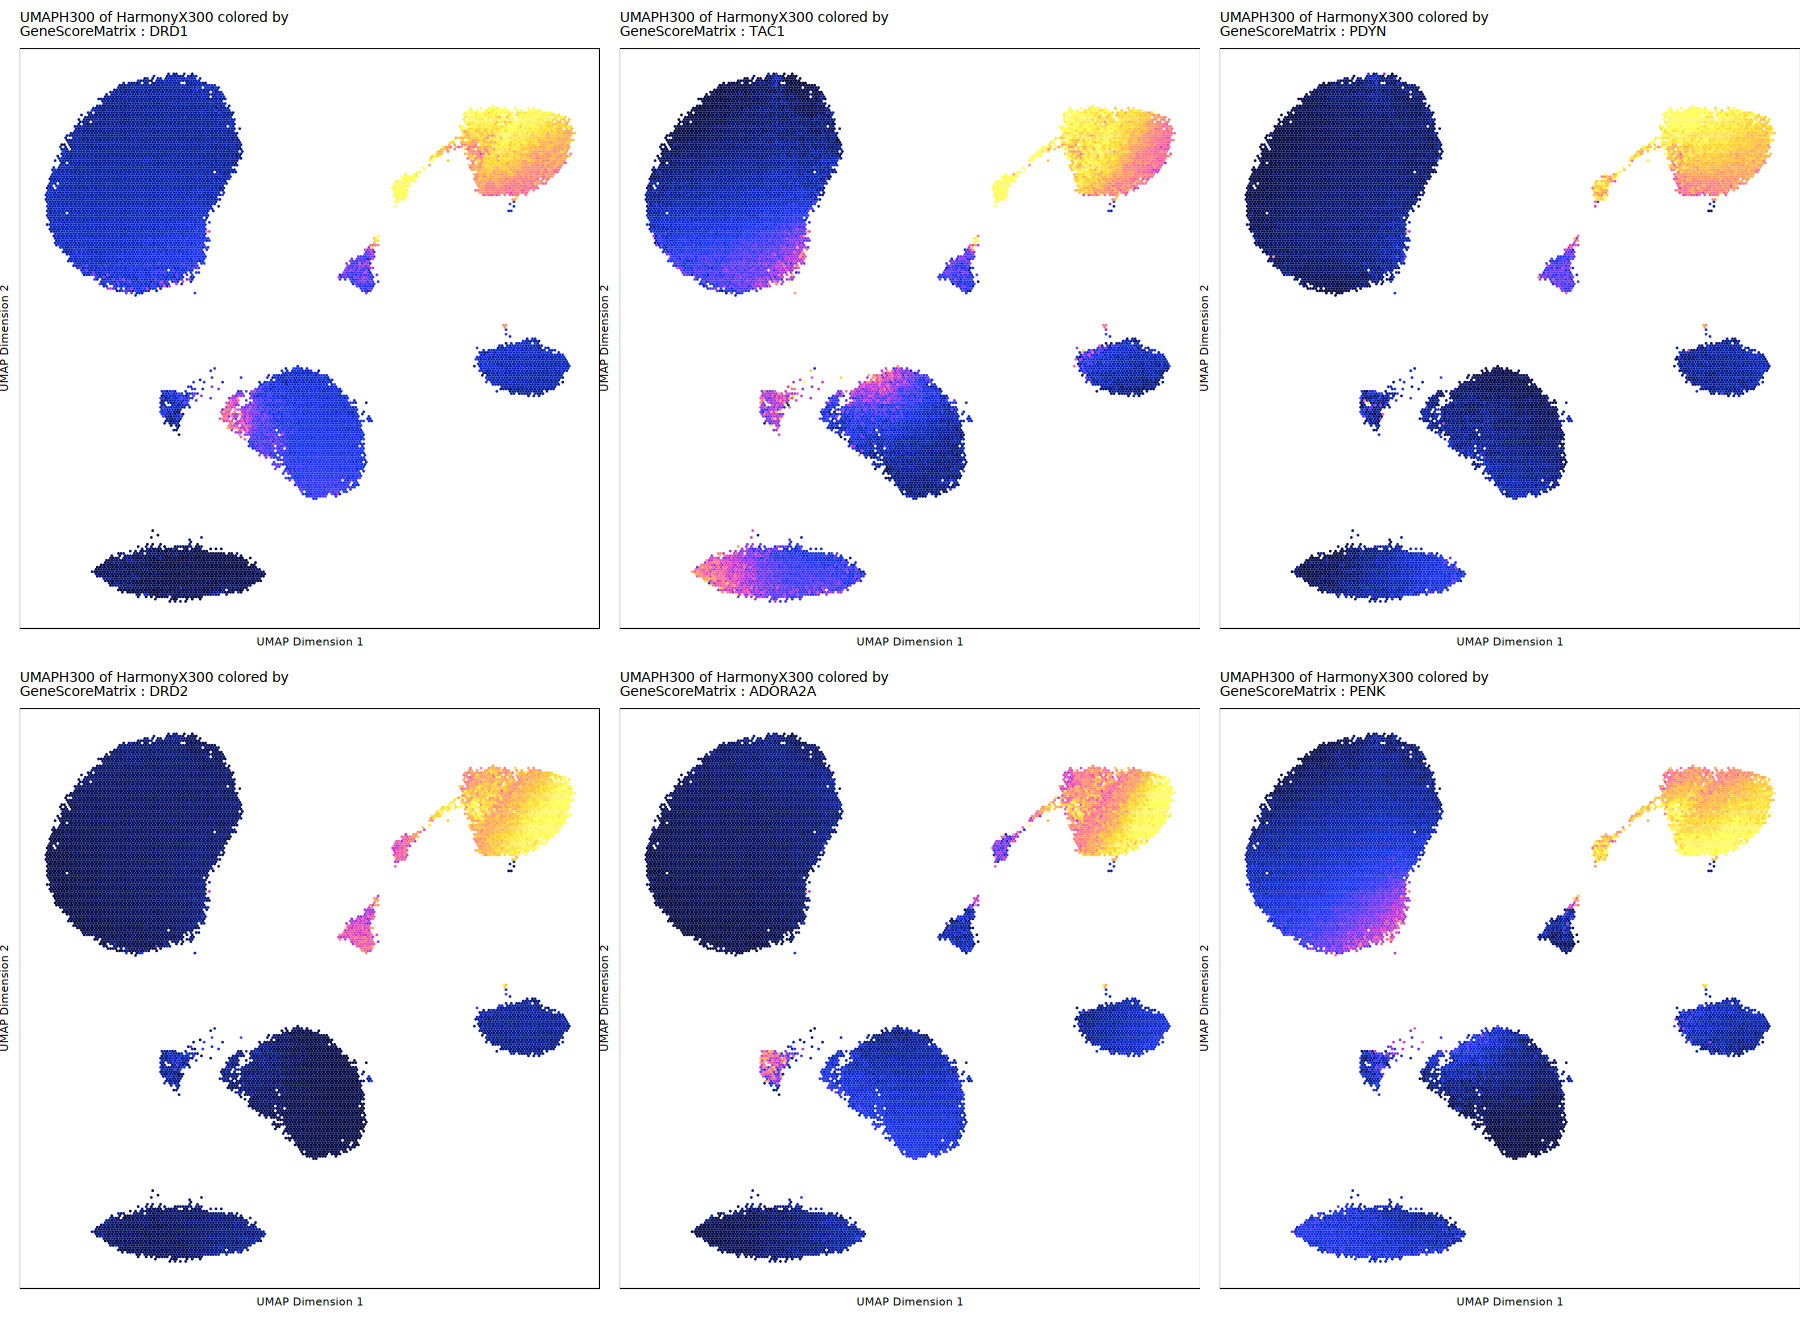

In [8]:
markMSN1 = c('DRD1','TAC1', 'PDYN', 'DRD2','ADORA2A','PENK') # D1 & D2 markers

# D1 MSN
p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markMSN1, embedding = "UMAPH300") #, imputeWeights = NULL) # 
p1 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme( axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
           axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p1))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74e137f5df91-Date-2024-03-25_Time-19-18-13.901515.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2024-03-25 19:18:14.807101 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74e137f5df91-Date-2024-03-25_Time-19-18-13.901515.log



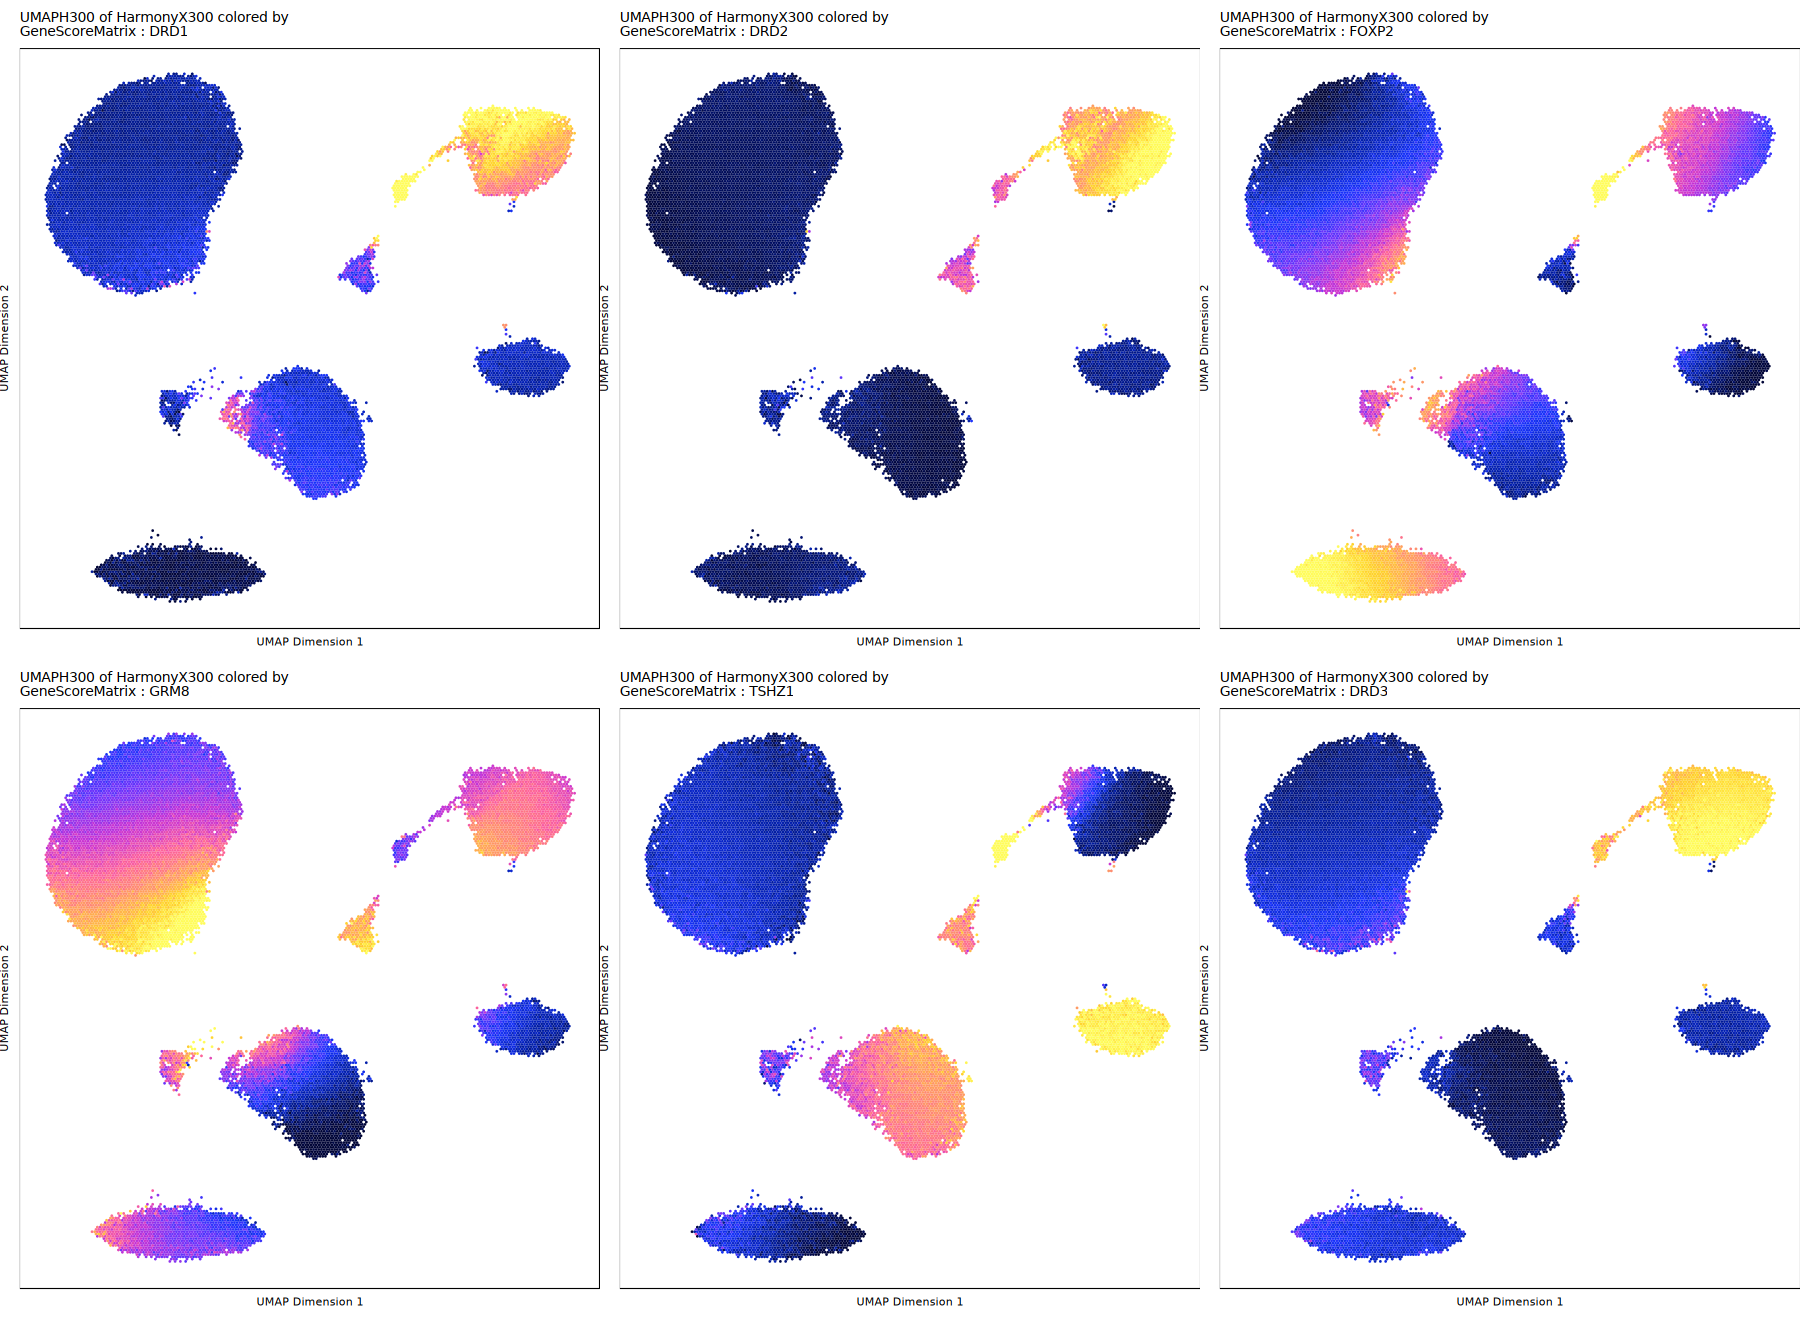

In [9]:
markMSN2 = c('DRD1', 'DRD2', 'FOXP2', 'GRM8','TSHZ1', 'DRD3')# eSPN, D1/D2, IC markers

# D2 MSN
p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markMSN2, embedding = "UMAPH300") #, imputeWeights = NULL)
p2 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74e1553032a4-Date-2024-03-25_Time-19-20-36.06761.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2024-03-25 19:20:37.666923 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74e1553032a4-Date-2024-03-25_Time-19-20-36.06761.log



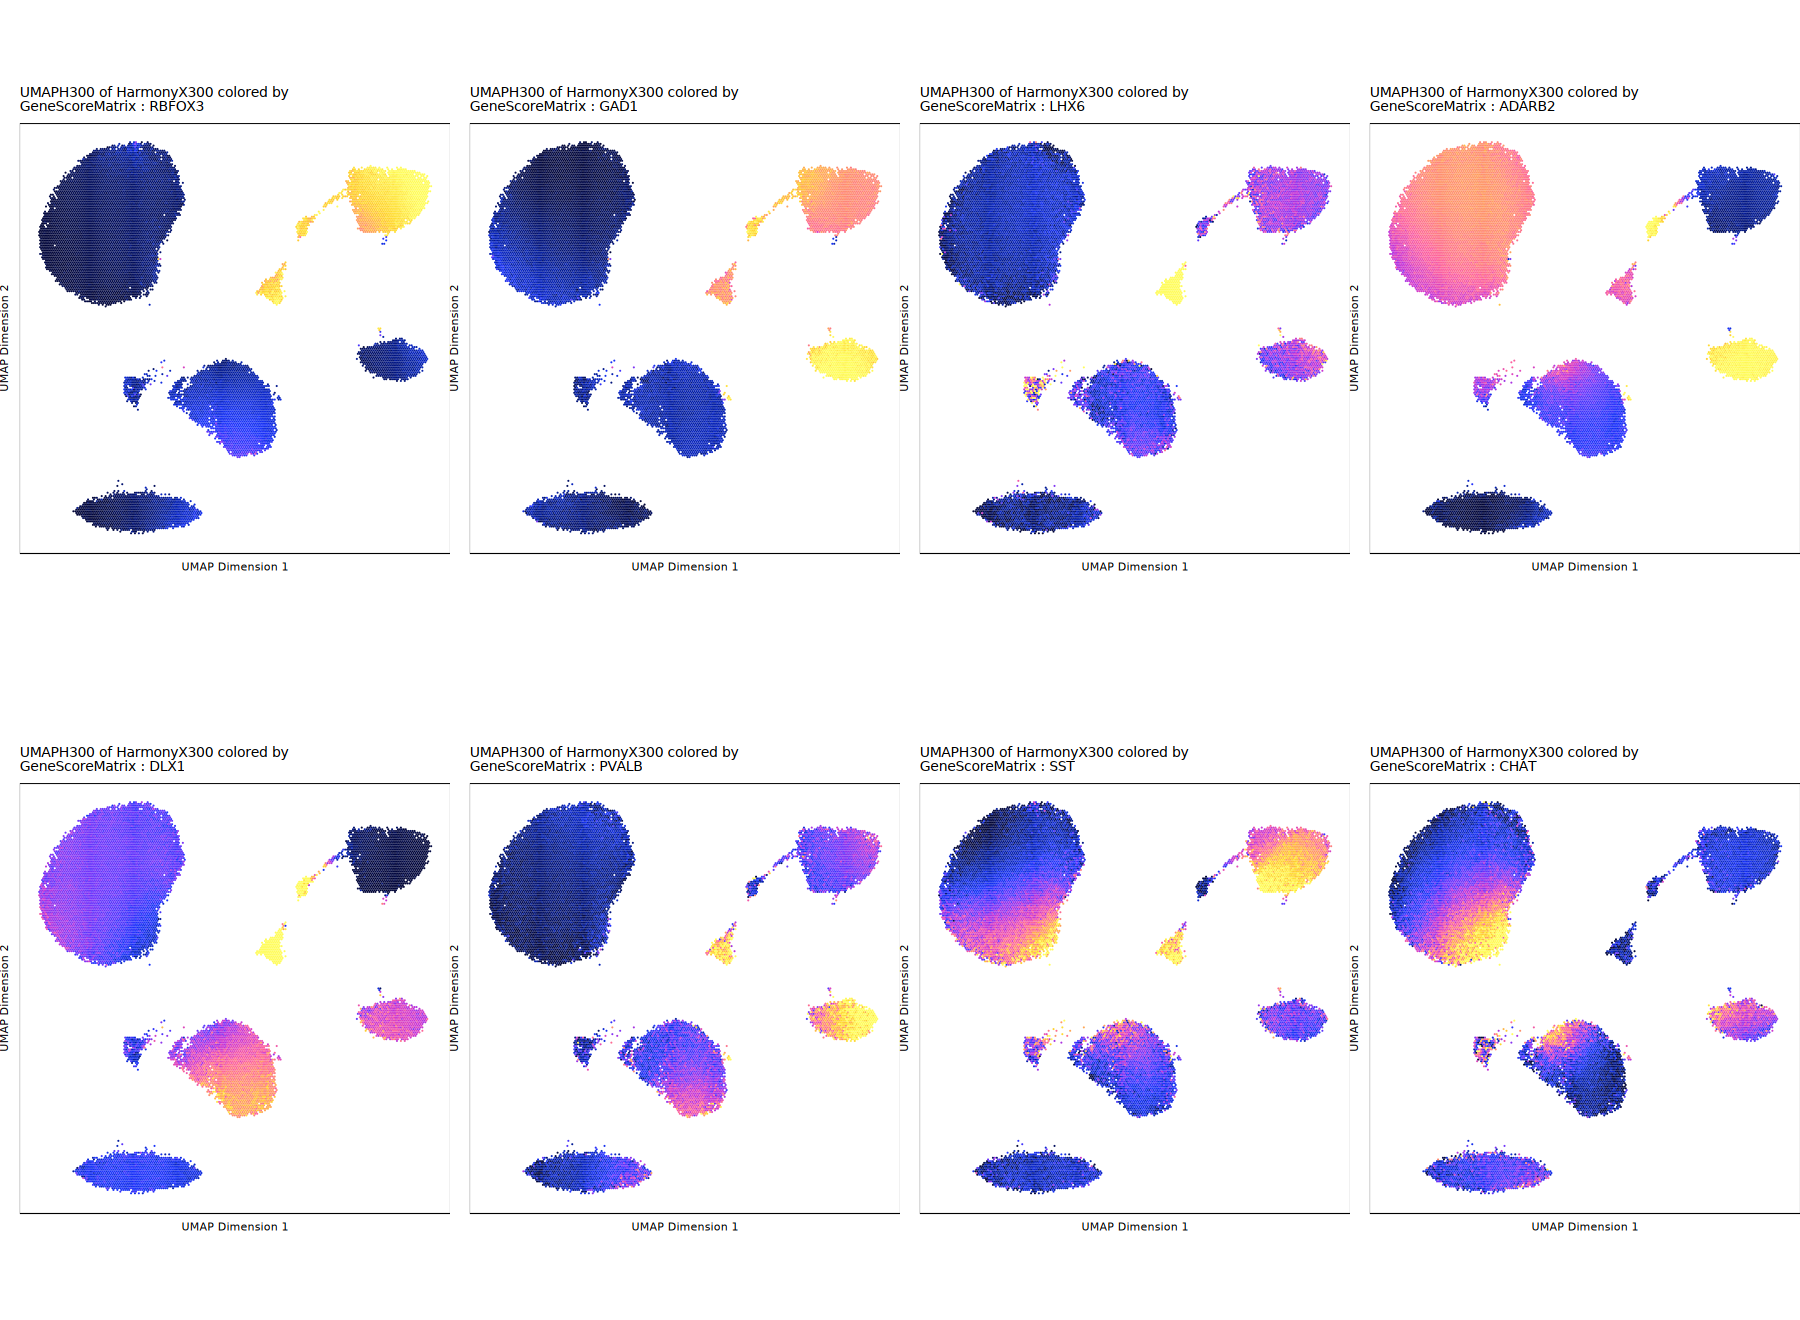

In [10]:
markINT2 = c('RBFOX3', 'GAD1','LHX6','ADARB2', 'DLX1', 'PVALB', 'SST','CHAT')# striatal interneuron markers

# D2 MSN
p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markINT2, embedding = "UMAPH300")
p2 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 4),p2))

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74e17f7aa6aa-Date-2024-03-25_Time-19-23-05.594197.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74e17f7aa6aa-Date-2024-03-25_Time-19-23-05.594197.log



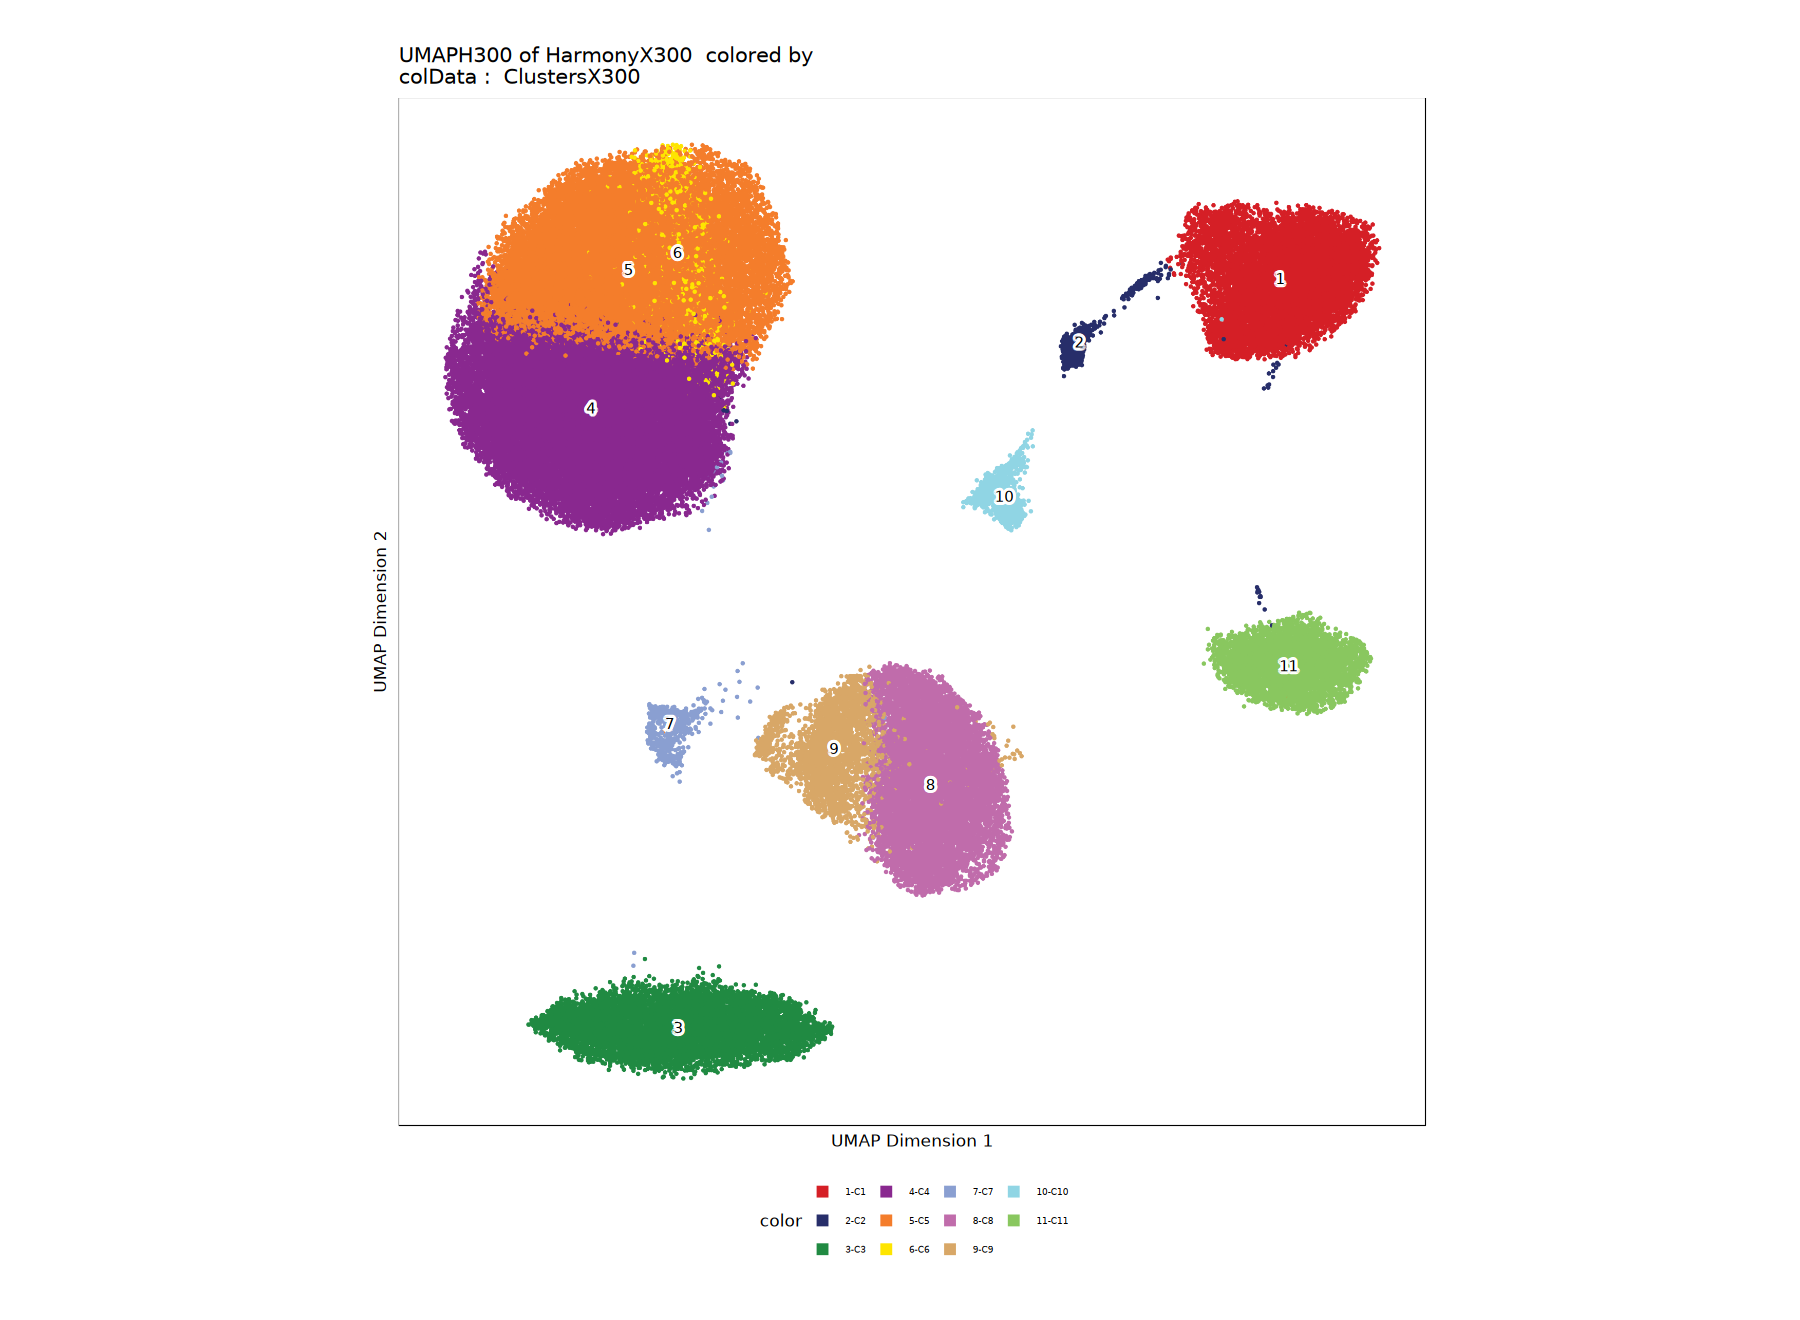

In [11]:
plotEmbedding( ArchRProj = proj, colorBy = "cellColData", name = c('ClustersX300'), embedding = "UMAPH300") 

In [13]:
###########################################
# using marker gene scores, give cluster names
remapClust <- c(
    'C1' = 'MSN',
    'C2' = 'MSN',
    'C3' = 'Microglia',
    'C4' = 'Oligo', 
    'C5'  = 'Oligo',
    'C6' = 'Oligo',
    'C7' = 'Drop',
    'C8' = 'Astro',
    'C9'  = 'Astro', 
    'C10'= 'INT',
    'C11' = 'OPC')
proj$Clusters2 <- mapLabels(proj$ClustersX300, newLabels = remapClust, oldLabels = names(remapClust))
table(proj$Clusters2)
table(proj$celltype, proj$Clusters2)


    Astro      Drop       INT Microglia       MSN     Oligo       OPC 
    12159       580       826      7727      9967     47794      4062 

            
             Astro  Drop   INT Microglia   MSN Oligo   OPC
  AMY            0     0     6         0     0     0     0
  ASCNT_1       11     1     0         0     0     0     0
  ASCNT_2      144     2     0         0     0     0     0
  ASCNT_3       16     0     0         0     0     4     0
  ASCT_1      2224    38     0         6     2   206    13
  ASCT_2      7461     0     0         0     1     0     0
  ASCT_3      1635     0     0         0     0     0     0
  BFEXA          0     0     0         0    39     0     0
  BNGA           0     0     0         0   108     0     0
  CBGRC          0     0     2         0     0     0     0
  CNGA_1         1     0   287         0     0     0     0
  CNGA_2         0     0   323         0     0     0     0
  CNMIX          0     0    10         0     0     0     0
  COP            0     0     0         0     0     7    60
  CT_1           0     0     2         0     0     0     0
  CTXMIX         0     0     1         0   

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-74e11f3e2db7-Date-2024-03-25_Time-19-38-31.667712.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-74e11f3e2db7-Date-2024-03-25_Time-19-38-31.667712.log



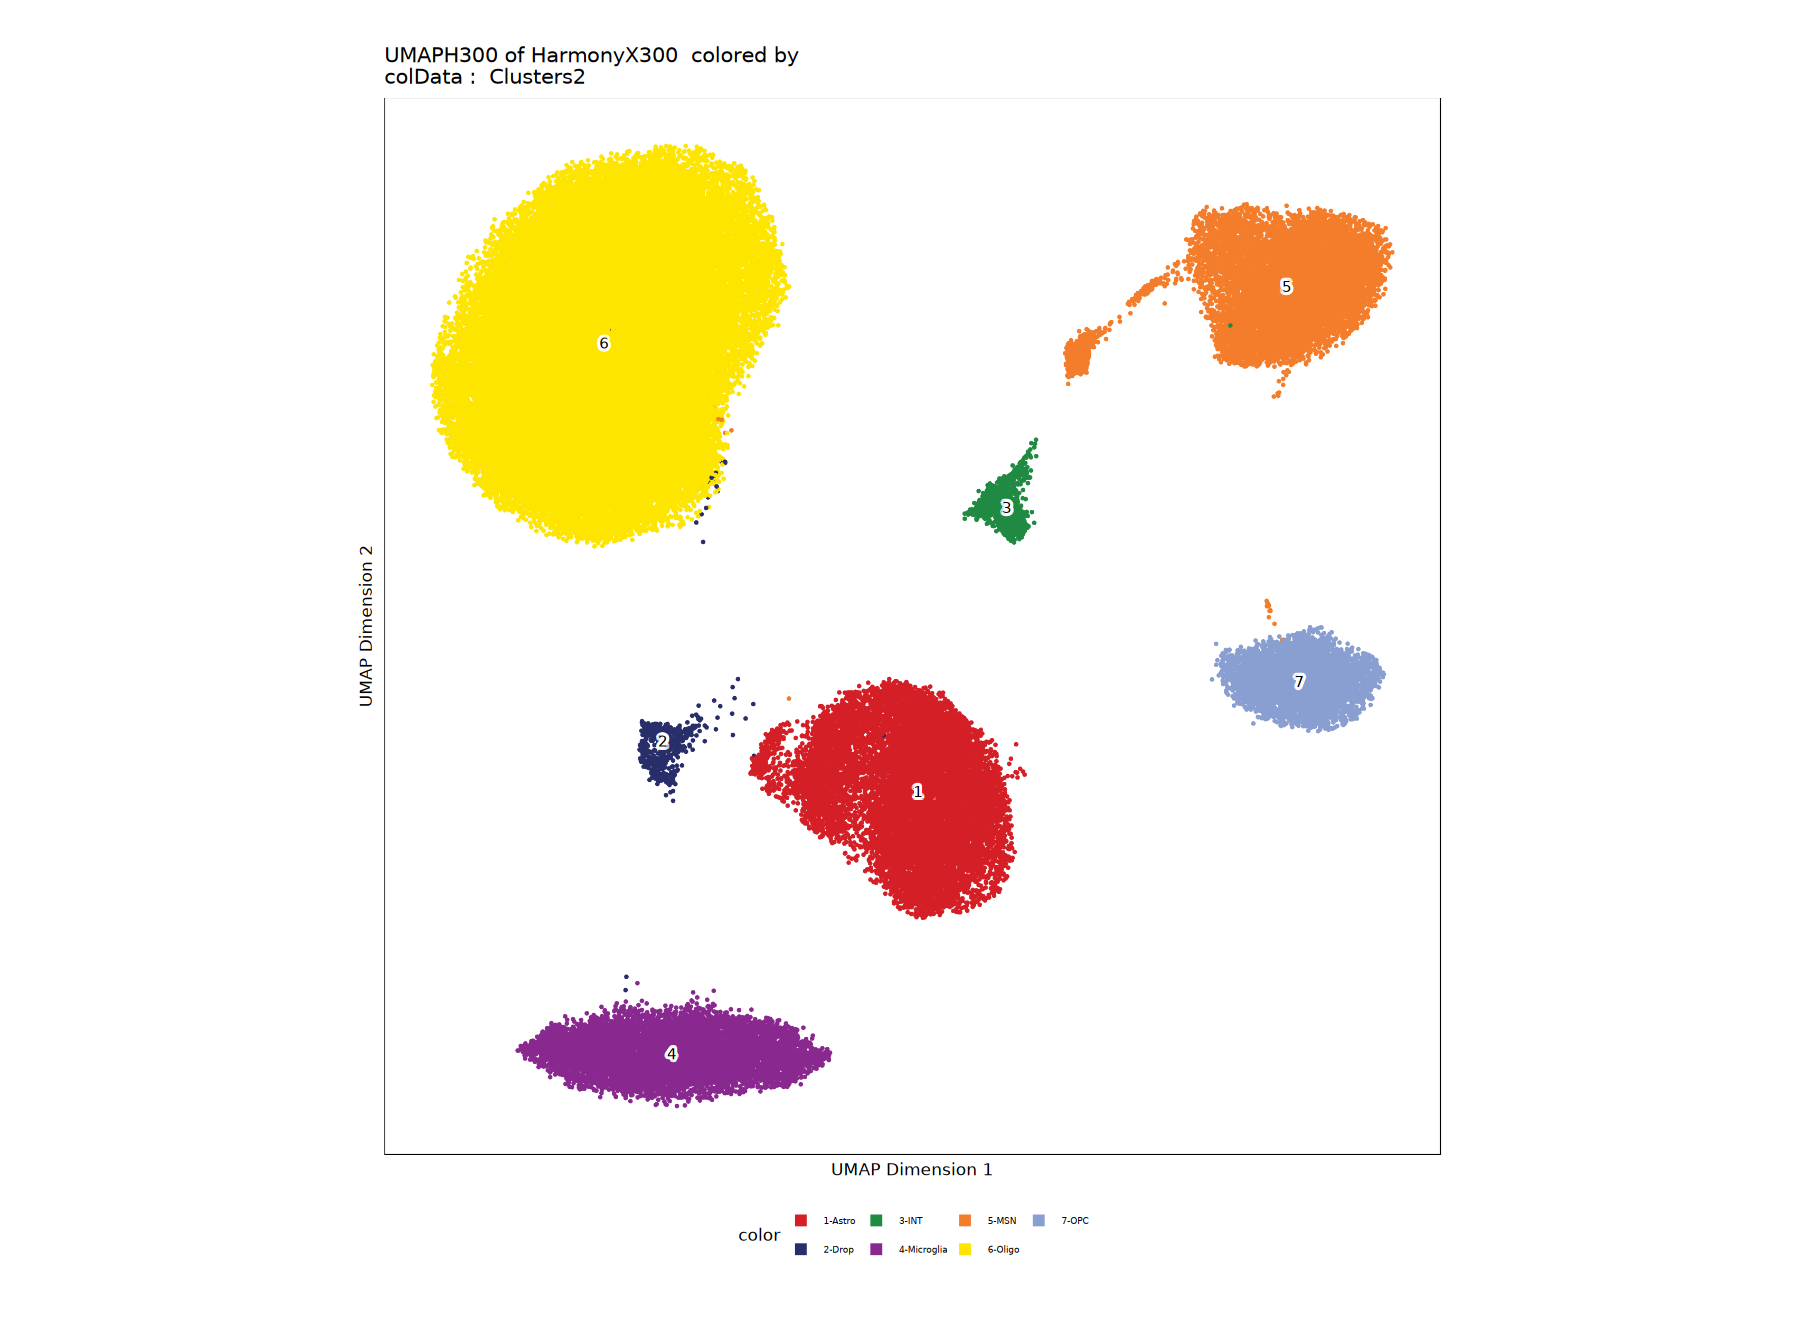

In [14]:
## make UMAP plots
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", name = "Clusters2", embedding = "UMAPH300")
p1

In [15]:
idxSample <- BiocGenerics::which(proj$Clusters2 %ni% "Drop")
cellsSample <- proj$cellNames[idxSample]

proj = saveArchRProject(ArchRProj = proj)

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         

In [17]:
# drop the drop clusters and make a copy that's just the MSNs
ARCHDIR2=here('data/tidy_data/ArchRProjects/BICCN_human_Str_snATAC_MSN')
idxSample <- BiocGenerics::which(proj$Clusters2 %in% c("MSN"))
cellsSample <- proj$cellNames[idxSample]

proj2 = subsetArchRProject(
  ArchRProj = proj,
  cells = cellsSample,
  outputDirectory = ARCHDIR2, force = T
)

Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!

Copying ArchRProject to new outputDirectory : /projects/pfenninggroup/singleCell/BICCN_human_CATlas_snATAC-seq/data/tidy_data/ArchRProjects/BICCN_human_Str_snATAC_MSN

Copying Arrow Files...

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 2): Embeddings

Copying Other Files (2 of 2): IterativeLSI300

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /            